# Install

## Install required dependencies.

In [ ]:
!pip install torch===1.7.1+cu110 torchvision===0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
! pip install pyyaml==5.1 pycocotools>=2.0.1

## Clone git repository.

In [1]:
!git clone https://github.com/PeizeSun/OneNet.git


Cloning into 'OneNet'...
remote: Enumerating objects: 602, done.
remote: Counting objects: 100% (602/602), done.
remote: Compressing objects: 100% (499/499), done.
remote: Total 602 (delta 135), reused 523 (delta 93), pack-reused 0
Receiving objects: 100% (602/602), 1.50 MiB | 6.74 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [2]:
%cd OneNet

/content/OneNet


## Setup the app cloned from github.

In [ ]:
!python setup.py build develop

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/build.py -> build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/lr_scheduler.py -> build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/solver
creating build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/compat.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/defaults.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/config.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/config
creating build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/boxe

## Craete the datasets directory and 'cd' into it.

In [3]:
! mkdir -p datasets/coco/

In [4]:
%cd datasets/coco/

/content/OneNet/datasets/coco


## Download the data from coco and unzip it.

In [ ]:
! wget http://images.cocodataset.org/zips/test2017.zip

--2021-06-09 10:55:41--  http://images.cocodataset.org/zips/test2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.243.172
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.243.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6646970404 (6.2G) [application/zip]
Saving to: ‘test2017.zip’

test2017.zip          4%[                    ] 276.53M  41.2MB/s    eta 2m 41s ^C


In [ ]:
! unzip test2017.zip

Archive:  test2017.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of test2017.zip or
        test2017.zip.zip, and cannot find test2017.zip.ZIP, period.


## Copy the trained model from my google drive to colab

In [5]:
%cd ../../

/content/OneNet


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
! cp /content/drive/MyDrive/School/DeepLearning/onenet_r18dcn.pth /content/OneNet/configs/

# Evaluate

In [ ]:
! python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/OneNet/configs/onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/OneNet/configs/onenet_r18dcn.pth'], resume=False)
[06/09 10:55:51 detectron2]: Rank of current process: 0. World size: 1
[06/09 10:55:52 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.0
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu110 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla T4 (arch=7.5)
CUDA_HOME            

# Visualize

In [ ]:
from os import listdir
from os.path import isfile, join
import random
import time
from IPython.display import Image
onlyfiles = [f for f in listdir('/content/OneNet/datasets/coco/test2017/') if isfile(join('/content/OneNet/datasets/coco/test2017/', f))]

## Randomly pick a picture from the set and Visualize it

In [ ]:
tmpFile = random.choice(onlyfiles)
inp = join('/content/OneNet/datasets/coco/test2017/', tmpFile)

In [ ]:
! python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input $inp --output /content/OneNet/output_onenet_r18dcn --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS /content/OneNet/configs/onenet_r18dcn.pth

[06/09 10:59:27 detectron2]: Arguments: Namespace(confidence_threshold=0.4, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/OneNet/datasets/coco/test2017/000000086769.jpg'], opts=['MODEL.WEIGHTS', '/content/OneNet/configs/onenet_r18dcn.pth'], output='/content/OneNet/output_onenet_r18dcn', video_input=None, webcam=False)
[06/09 10:59:31 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/OneNet/configs/onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][06/09 10:59:31 detectron2]: /content/OneNet/datasets/coco/test2017/000000086769.jpg: detected 2 instances in 0.10s
100% 1/1 [00:00<00:00,  6.09it/s]


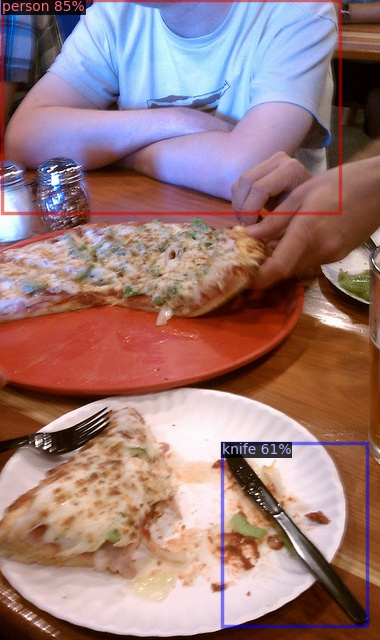

In [ ]:
imgs = [f for f in listdir('/content/OneNet/output_onenet_r18dcn/') if isfile(join('/content/OneNet/datasets/coco/test2017/', f))]
Image(join('/content/OneNet/output_onenet_r18dcn/', tmpFile))